#                    Student Grade Prediction

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [161]:
#read data
df=pd.read_csv('student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
#check for missing data
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
#finding datatypes
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [11]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [12]:
#processing the data
# as there no missing data we can caotinue
#if missing data exits we can use proper function or different kinds of means,frequencies


In [19]:
#data visualization using pyplot

df.dtypes=='int64'


school        False
sex           False
age            True
address       False
famsize       False
Pstatus       False
Medu           True
Fedu           True
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime     True
studytime      True
failures       True
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel         True
freetime       True
goout          True
Dalc           True
Walc           True
health         True
absences       True
G1             True
G2             True
G3             True
dtype: bool

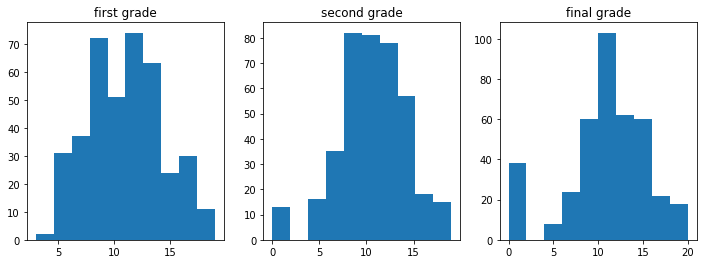

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].hist(df['G1'])
axes[0].set_title("first grade")


axes[1].hist(df['G2'])
axes[1].set_title("second grade")

axes[2].hist(df['G3'])
axes[2].set_title("final grade");

In [46]:
##counting no of students pocessing final garde 10
df[df['G3']==10].count().head(1)

school    56
dtype: int64

C:\Users\UESR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='absences', ylabel='Density'>

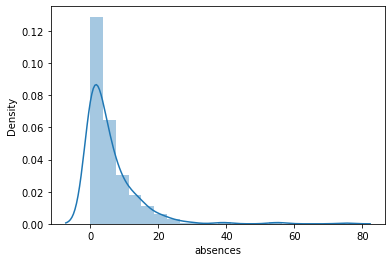

In [55]:
#data visualisation using seaborn
sns.distplot(df['absences'],bins=20)


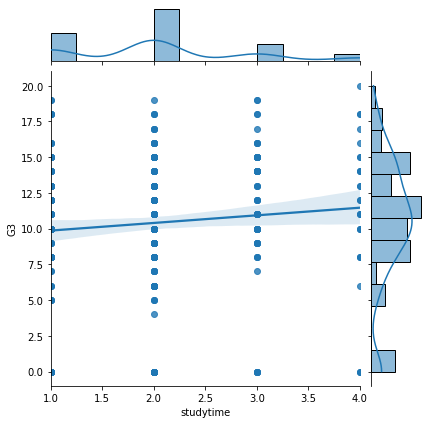

In [59]:
#visualizing the co-relation between study time and G3
sns.jointplot(x='studytime',y='G3',data=df,kind='reg')

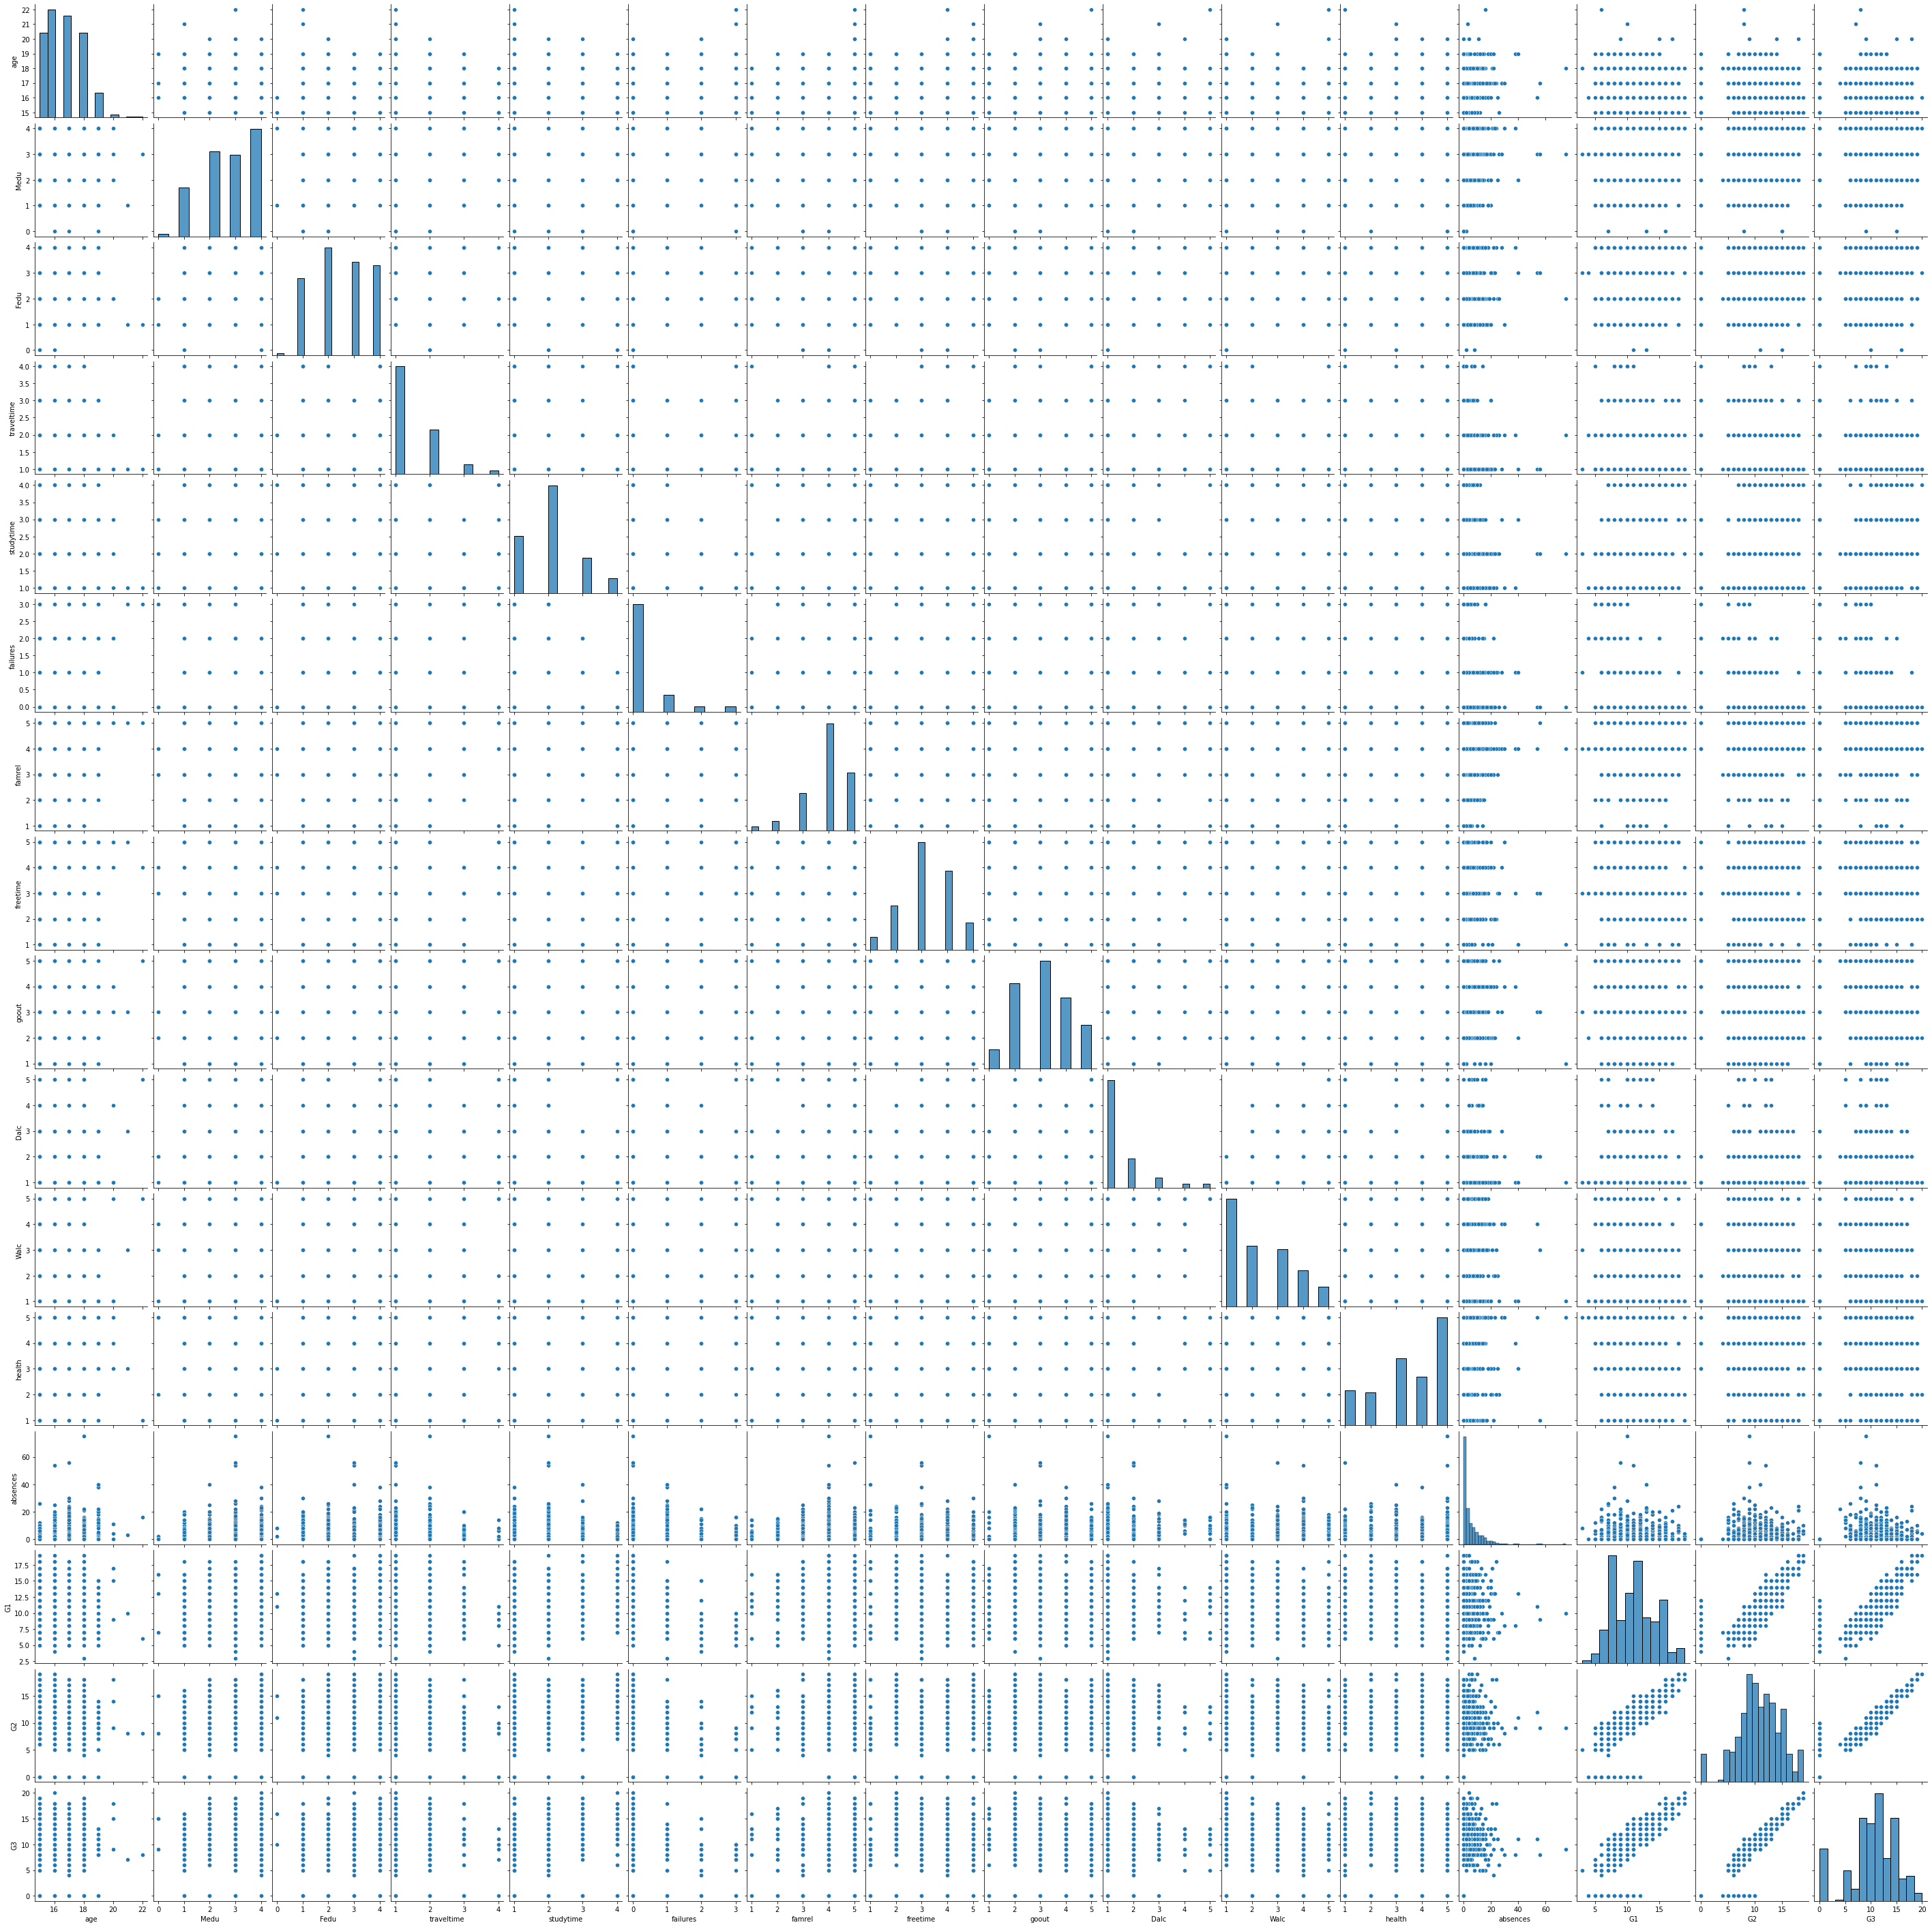

In [60]:
#visualizing the co-relation between every int type variable from the data 
sns.pairplot(data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

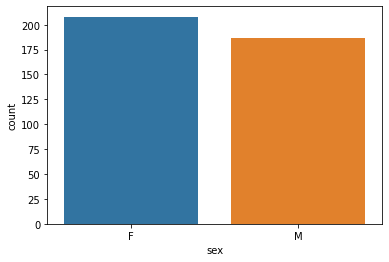

In [61]:

sns.countplot(x='sex',data=df)

<AxesSubplot:xlabel='sex', ylabel='G3'>

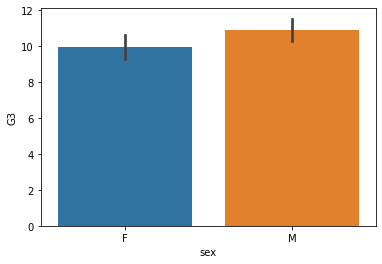

In [62]:
#comparing the final grade among sex 
sns.barplot(x='sex',y='G3',data=df)

<AxesSubplot:xlabel='G3', ylabel='absences'>

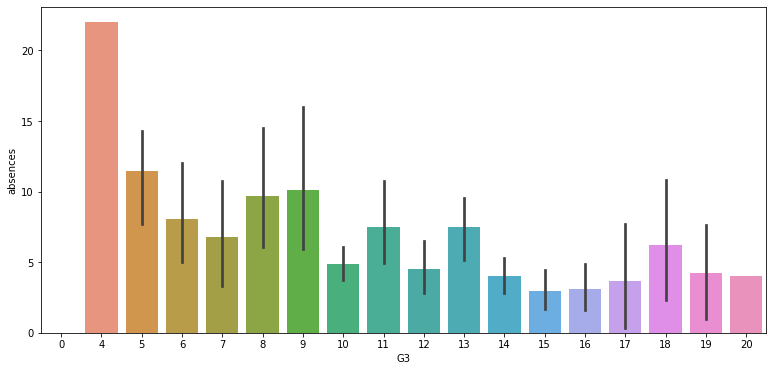

In [69]:
#comparing the realtion between grade and absences
plt.figure(figsize=(13,6))
sns.barplot(x='G3',y='absences',data=df)

<AxesSubplot:>

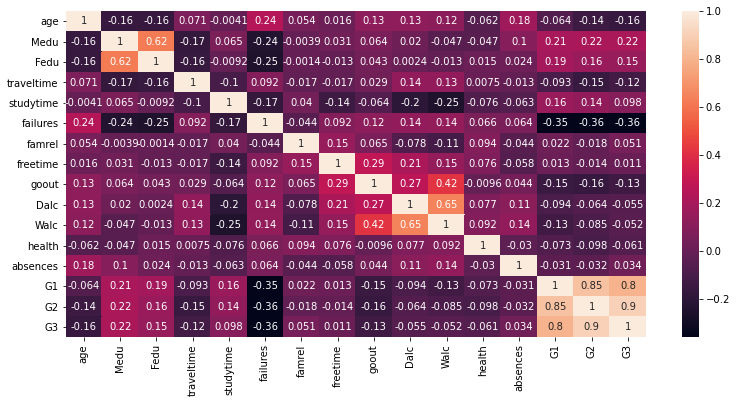

In [74]:
# visualization using heat map
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(),annot=True)

In [87]:
df1=df[['G3','age','studytime']]

In [88]:
df1=df1.pivot_table(values='G3',index='studytime',columns='age')
df1

age,15,16,17,18,19,20,21,22
studytime,,,,,,,,
1,12.523810,10.382353,9.560000,8.352941,5.000000,18.0,7.0,8.0
2,10.921053,10.962963,10.040000,9.047619,8.923077,9.0,NaN,NaN
3,10.500000,12.636364,11.421053,11.529412,9.600000,15.0,NaN,NaN
4,10.818182,12.600000,12.250000,10.833333,8.000000,NaN,NaN,NaN


<AxesSubplot:xlabel='age', ylabel='studytime'>

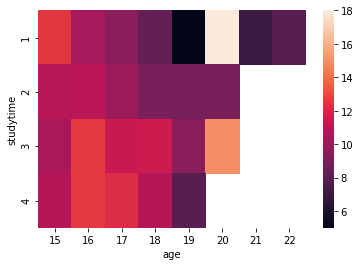

In [89]:
sns.heatmap(df1)

<AxesSubplot:xlabel='health', ylabel='G3'>

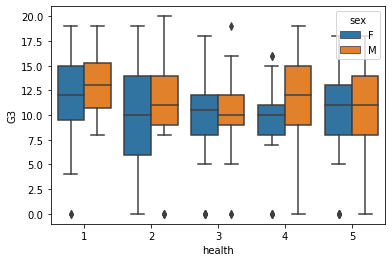

In [99]:
sns.boxplot(x='health',y='G3',data=df,hue='sex')

In [92]:
#corelating the variables
df.corr()['G3']

age          -0.161579
Medu          0.217147
Fedu          0.152457
traveltime   -0.117142
studytime     0.097820
failures     -0.360415
famrel        0.051363
freetime      0.011307
goout        -0.132791
Dalc         -0.054660
Walc         -0.051939
health       -0.061335
absences      0.034247
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [162]:
#Processing data for creating the model
#getting dummies for the object datatype variables
Sex=pd.get_dummies(df['sex'],drop_first=True)
Address=pd.get_dummies(df['address'],drop_first=True)
Famsize=pd.get_dummies(df['famsize'],drop_first=True)
pstatus=pd.get_dummies(df['Pstatus'],drop_first=True)
School=pd.get_dummies(df['school'],drop_first=True)
Schoolsup=pd.get_dummies(df['schoolsup'],drop_first=True)
Famsup=pd.get_dummies(df['famsup'],drop_first=True)
Higher=pd.get_dummies(df['higher'],drop_first=True)
Internet=pd.get_dummies(df['internet'],drop_first=True)
Romantic=pd.get_dummies(df['romantic'],drop_first=True)

In [163]:
df.drop(['sex','address','famsize','Pstatus','school','schoolsup','famsup','higher','internet','romantic','Mjob','Fjob','reason','guardian','paid','activities','nursery'],axis=1,inplace=True)
df=pd.concat([df,Sex,Address,Famsize,pstatus,School,Schoolsup,Famsup,Higher,Internet,Romantic],axis=1)

In [170]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('G3',axis=1))
scaleddata=scaler.transform(df.drop('G3',axis=1))
scaleddata

array([[ 1.02304645,  1.14385567,  1.36037064, ...,  0.23094011,
        -2.23267743, -0.70844982],
       [ 0.23837976, -1.60000865, -1.39997047, ...,  0.23094011,
         0.44789274, -0.70844982],
       [-1.33095364, -1.60000865, -1.39997047, ...,  0.23094011,
         0.44789274, -0.70844982],
       ...,
       [ 3.37704655, -1.60000865, -1.39997047, ...,  0.23094011,
        -2.23267743, -0.70844982],
       [ 1.02304645,  0.22923423, -0.47985677, ...,  0.23094011,
         0.44789274, -0.70844982],
       [ 1.80771315, -1.60000865, -1.39997047, ...,  0.23094011,
         0.44789274, -0.70844982]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit()

In [148]:
#clasification using KNN theory
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=17)
from sklearn.preprocessing import StandardScaler

In [171]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaleddata,df['G3'],test_size=0.2)

In [178]:
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=17)

In [196]:
pred=knn.predict(X_test)
y_test

141     9
236    13
5      15
83     15
358    10
       ..
137     0
15     14
165    12
12     14
59     16
Name: G3, Length: 79, dtype: int64

In [319]:
final1=pd.DataFrame(pred,columns=['predicted'])
final2=pd.DataFrame(y_test.values,columns=['actual'])
final=pd.concat([final1,final2],axis=1)
final

,predicted,actual
0,0,9
1,12,13
2,12,15
3,12,15
4,10,10
...,...,...
74,0,0
75,14,14
76,10,12
77,11,14


In [179]:

from sklearn import metrics

In [209]:
mse=metrics.mean_squared_error(pred,y_test)
mse

15.189873417721518

C:\Users\UESR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\UESR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='G3', ylabel='Density'>

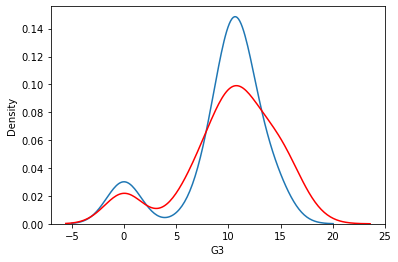

In [211]:
sns.distplot(pred,hist=False)
sns.distplot(y_test,color='r',hist=False)


In [186]:
from sklearn.metrics import classification_report,confusion_matrix

In [188]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.40      0.50      0.44         8
           5       0.00      0.00      0.00         1
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         3
           8       0.17      0.14      0.15         7
           9       0.00      0.00      0.00         3
          10       0.33      0.36      0.34        14
          11       0.08      0.25      0.12         8
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         4
          14       0.25      0.40      0.31         5
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1

    accuracy                           0.19        79
   macro avg       0.15      0.13      0.12        79
weighted avg       0.18   

C:\Users\UESR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [189]:
print(confusion_matrix(y_test,pred))

[[4 0 0 0 0 1 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 2 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 1 1 0 3 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 3 0 5 5 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 2 2 0 1 1 0 0 0 0]
 [0 0 0 0 0 1 3 4 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 2 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 1 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 3 3 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]


In [200]:
#as f1-score is very low while using knn theory we move to decision tree thoery
#model using decision tree
from sklearn.tree import DecisionTreeClassifier

In [201]:
tree=DecisionTreeClassifier()

In [202]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [315]:
predtree=tree.predict(X_test)
predtree

array([10, 13, 15, 18, 12,  0, 12,  8,  9,  6,  8, 10,  0,  6, 15,  9, 18,
       11, 18, 18, 16,  9, 15, 16,  9, 10,  9, 10,  8, 10, 10, 11,  8, 15,
       14, 15,  5, 15,  0, 16,  8,  8, 17,  8, 13, 10, 12, 11, 12, 11, 14,
        6,  0, 11,  9, 13,  7,  0,  6, 13, 11, 10, 10, 13, 13,  0, 10, 14,
        0, 16, 14,  0, 12, 13,  0, 14, 11, 13, 18], dtype=int64)

In [320]:
final1=pd.DataFrame(predtree,columns=['predicted'])
final2=pd.DataFrame(y_test.values,columns=['acctual'])
final=pd.concat([final1,final2],axis=1)
final

,predicted,acctual
0,10,9
1,13,13
2,15,15
3,18,15
4,12,10
...,...,...
74,0,0
75,14,14
76,11,12
77,13,14


In [206]:
print(classification_report(y_test,predtree))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           5       0.00      0.00      0.00         1
           6       0.50      0.67      0.57         3
           7       0.00      0.00      0.00         3
           8       0.29      0.29      0.29         7
           9       0.00      0.00      0.00         3
          10       0.50      0.36      0.42        14
          11       0.43      0.38      0.40         8
          12       0.20      0.11      0.14         9
          13       0.38      0.75      0.50         4
          14       0.40      0.40      0.40         5
          15       0.67      0.50      0.57         8
          16       0.50      0.50      0.50         4
          17       0.00      0.00      0.00         1
          18       0.20      1.00      0.33         1

    accuracy                           0.42        79
   macro avg       0.33      0.40      0.34        79
weighted avg       0.43   

C:\Users\UESR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\UESR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='G3', ylabel='Density'>

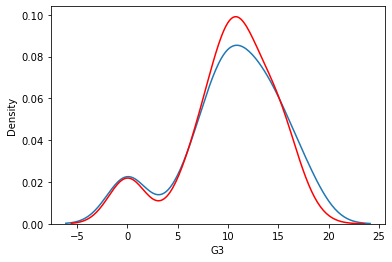

In [212]:
sns.distplot(predtree,hist=False)
sns.distplot(y_test,color='r',hist=False)

In [322]:
#Creating a model using OneVsOneClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
ovo= OneVsOneClassifier(LinearSVC())

In [323]:
ovo.fit(X_train,y_train)

OneVsOneClassifier(estimator=LinearSVC())

In [324]:
predo=ovo.predict(X_test)
final1=pd.DataFrame(predo,columns=['predicted'])
final2=pd.DataFrame(y_test.values,columns=['actual'])
final=pd.concat([final1,final2],axis=1)
final

,predicted,actual
0,10,9
1,13,13
2,18,15
3,15,15
4,11,10
...,...,...
74,0,0
75,14,14
76,12,12
77,16,14


In [325]:
print(classification_report(y_test,predo))

C:\Users\UESR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\UESR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.50      0.67      0.57         3
           7       0.00      0.00      0.00         3
           8       0.50      0.29      0.36         7
           9       0.00      0.00      0.00         3
          10       0.60      0.43      0.50        14
          11       0.18      0.25      0.21         8
          12       0.29      0.22      0.25         9
          13       0.14      0.25      0.18         4
          14       0.14      0.20      0.17         5
          15       0.33      0.25      0.29         8
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1

    accuracy                           0.32        79
   macro avg       0.22   

C:\Users\UESR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\UESR\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='G3', ylabel='Density'>

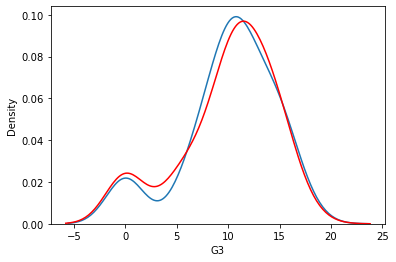

In [326]:
sns.distplot(y_test,hist=False)
sns.distplot(predo,color='r',hist=False)